In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df_1 = pd.read_csv('../DataSets/Human Activity Recognition with Smartphones.csv')
df_2 = sns.load_dataset('titanic')

In [64]:
df_1.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [65]:
df_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
df_1["subject"]

0        2
1        2
2        2
3        2
4        2
        ..
2942    24
2943    24
2944    24
2945    24
2946    24
Name: subject, Length: 2947, dtype: int64

In [67]:
# The categorical feature ‘subject’ is removed to focus on numerical feature selection, while retaining the categorical target ‘activity’.
df_1.drop(columns=['subject'] , inplace=True)

In [68]:
df_1["Activity"].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [69]:
print(df_1.shape)

(2947, 562)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
# Separating features and target variable
x = df_1.drop(columns=['Activity'])
y = df_1['Activity']


# Encode target labels so that they can be used in machine learning algorithms that require numerical input.
le = LabelEncoder()
y = le.fit_transform(y)


# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

`Note :` **Before applying feature selection it is important to split the dataset into training and testing sets to avoid data leakage. Feature selection should be performed only on the training set, and then the selected features should be applied to the test set.**

In [72]:
print(x_train.shape)
print(x_test.shape)

(2357, 561)
(590, 561)


#### Applying Logistic Regression 

In [73]:
# initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)     # Increased max_iter to ensure convergence

# Fitting the model on training data
log_reg.fit(x_train, y_train)

# Making predictions on the test data
y_pred = log_reg.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Logistic Regression model: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression model: 99.49%


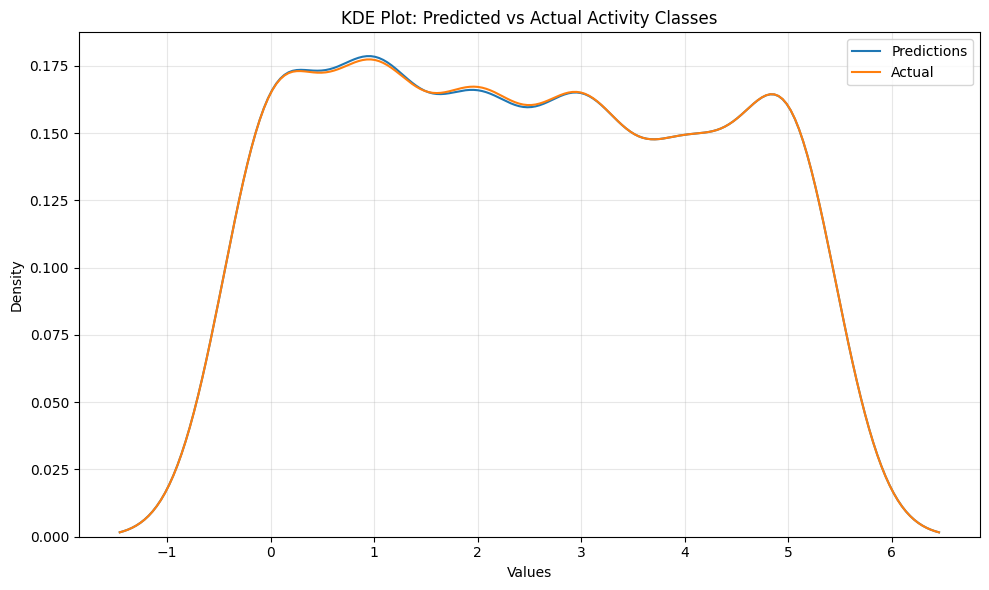

In [74]:
# Ploting 
plt.figure(figsize=(10, 6))

sns.kdeplot(y_pred )
sns.kdeplot(y_test )


plt.legend(['Predictions', 'Actual'], loc='upper right')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KDE Plot: Predicted vs Actual Activity Classes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Deleting Duplicate Features**

In [75]:
# finding duplicate features

duplicate_features = x_train.columns[x_train.T.duplicated()]        
# .T is used to transpose the DataFrame so that we can check for duplicate rows (features in original DataFrame)
# here .duplicated() returns a boolean Series indicating whether each row is a duplicate of a previous row and 
# we use this boolean Series to index the transposed DataFrame's columns to get the names of the duplicate features. 

print(f'Duplicate features: {list(duplicate_features)}')

Duplicate features: ['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4', 'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()', 'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()', 'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()']


In [76]:
# Removing duplicate features from training and testing sets

# method 1
x_train.drop(columns=duplicate_features, inplace=True)
x_test.drop(columns=duplicate_features, inplace=True)

# method 2
# df_1 = df_1.loc[:, ~df_1.T.duplicated(keep='first')]  # keep='first' keeps the first occurrence and removes subsequent duplicates

In [77]:
x_train.shape

(2357, 540)

In [78]:
x_test.shape

(590, 540)

In [79]:
df_1.shape

(2947, 562)

## **Variance Threshold**

In [80]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.05)  # Removing features with variance less than 0.05

In [81]:
sel.fit(x_train)        
# It will calculate the variance of each feature in x_train and determine which features meet the specified variance threshold
# and returns a boolean mask indicating which features are selected (True) and which are removed (False).

,"threshold threshold: float, default=0Features with a training-set variance lower than this threshold willbe removed. The default is to keep all features with non-zero variance,i.e. remove the features that have the same value in all samples.",0.05


In [82]:
sum(sel.get_support())  # get_support() returns a boolean mask of the selected features, and sum() counts how many features are selected.

np.int64(329)

In [83]:
selected_features = x_train.columns[sel.get_support()]  # This will give the names of the features that are selected based on the variance threshold.

In [84]:
selected_features

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=329)

In [85]:
# Transforming the training data to keep only the selected features

x_train_selected = sel.transform(x_train)  
x_test_selected = sel.transform(x_test)    

type(x_train_selected)  # The output will be a NumPy array containing only the selected features from the original x_train DataFrame.

numpy.ndarray

In [86]:
# Converting the NumPy array back to a DataFrame for 

x_train_selected_df = pd.DataFrame(x_train_selected, columns=selected_features)  
x_test_selected_df = pd.DataFrame(x_test_selected, columns=selected_features)  

In [87]:
x_train_selected_df.shape

(2357, 329)

In [88]:
# Directly using .set_output() method to get the selected features as a DataFrame without needing to convert from NumPy array
sel.set_output(transform="pandas")  # This will make the output of transform() a pandas DataFrame instead of a NumPy array

# so now we can directly get the selected features as a DataFrame without needing to convert from NumPy array like this:
x_train_selected_df = sel.transform(x_train)
x_test_selected_df = sel.transform(x_test)

# for simplicity
x_train = x_train_selected_df
x_test = x_test_selected_df

In [89]:
type(x_train), x_train.shape

(pandas.core.frame.DataFrame, (2357, 329))

## **Correlation**

In [90]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap of Selected Features')

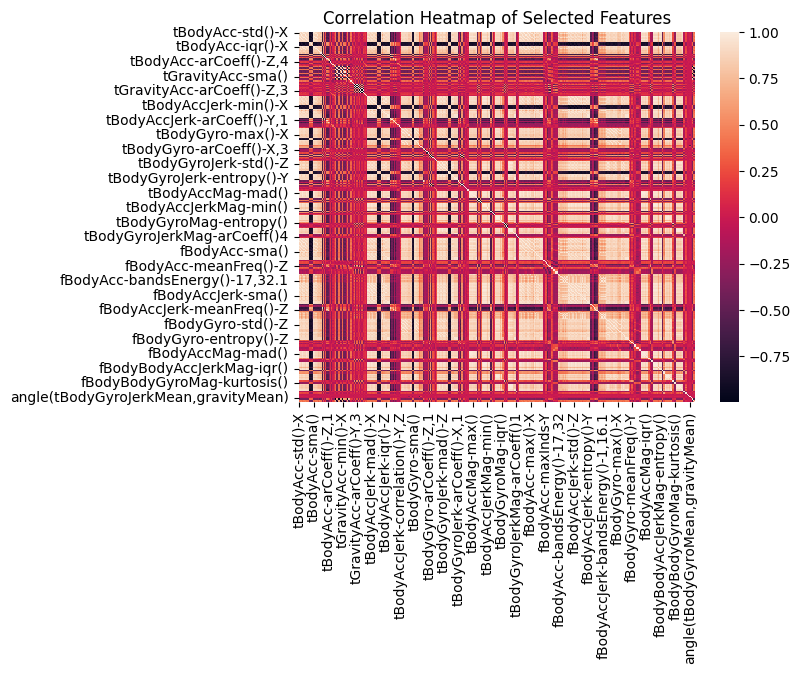

In [91]:
sns.heatmap(x_train.corr())
plt.title('Correlation Heatmap of Selected Features')

In [92]:
corr_matrix = x_train.corr()

In [93]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1424


In [94]:
columns_to_drop = set(columns_to_drop)  # Removing duplicates from the list of columns to drop

In [95]:
len(columns_to_drop)

181

In [96]:
# Dropping the columns with high correlation from the training and test sets
# inplace=True means that the changes will be made directly to the DataFrame 
# errors='ignore' allows the cell to be run multiple times without KeyError if columns are already dropped

x_train.drop(columns=columns_to_drop, inplace=True, errors='ignore') 
x_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [97]:
print(f'Shape of x_train after dropping highly correlated features: {x_train.shape}')
print(f'Shape of x_test after dropping highly correlated features: {x_test.shape}')

Shape of x_train after dropping highly correlated features: (2357, 148)
Shape of x_test after dropping highly correlated features: (590, 148)


## **Anova**

In [98]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel_kbest = SelectKBest(score_func=f_classif, k=100).fit(x_train, y_train)
# SelectKBest will select the top 100 features based on the ANOVA F-value between label/feature for classification tasks.

# display the selected features 
x_train.columns[sel_kbest.get_support()]  # This will return the names of the selected features.

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X',
       'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-arCoeff()-Y,1',
       'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Z,1',
       'tGravityAcc-arCoeff()-Z,2', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-arCoeff()-X,3', '

In [99]:
columns = x_train.columns[sel_kbest.get_support()]  
# This will give the names of the selected features based on ANOVA F-value.

In [100]:
sel_kbest.set_output(transform="pandas") 

x_train = sel_kbest.transform(x_train)
x_test = sel_kbest.transform(x_test)

In [101]:
print(x_train.shape)
print(x_test.shape)

(2357, 100)
(590, 100)


## **Chi-Square Test**

We can not apply chi-square here because it needs both input and output features to be non-negative and categorical in nature. Since our features are continuous numerical values (not categorical), chi-square test is not suitable for this feature selection task. Chi-square is typically used for categorical variables to test the independence between features and the target variable. 

In [ ]:
# Chi-Square test cannot be applied to the current dataset because it requires both input 
# and output features to be categorical and non-negative. Since our features are continuous 
# numerical values, chi-square is unsuitable. We will apply chi-square on the Titanic dataset 
# after checking accuracy with feature selection below.

## **Accuracy after Feature Selection**

In [102]:
# checking the accuracy of the model after feature selection

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy}")

Accuracy after feature selection: 0.9813559322033898


In [103]:
# lets try out with 50 important features instead of 100

sel_kbest_50 = SelectKBest(score_func=f_classif, k=50).fit(x_train, y_train)

x = x_train.columns[sel_kbest_50.get_support()]  

sel_kbest_50.set_output(transform="pandas") 

x_train = sel_kbest_50.transform(x_train)
x_test = sel_kbest_50.transform(x_test)

print(x_train.shape)
print(x_test.shape)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy}")

(2357, 50)
(590, 50)
Accuracy after feature selection: 0.9525423728813559


since after selecting 50 features the accuracy is almost the same as before feature selection, we can conclude that the selected features are the most important features for our model.

## **Chi-Square Test on Titanic Dataset**

In [116]:
df_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [127]:
titanic = df_2[['pclass','sex','sibsp','parch','embarked','class','survived']]

In [125]:
titanic

,pclass,sex,sibsp,parch,embarked,class,survived
0,3,male,1,0,S,Third,0
1,1,female,1,0,C,First,1
2,3,female,0,0,S,Third,1
3,1,female,1,0,S,First,1
4,3,male,0,0,S,Third,0
...,...,...,...,...,...,...,...
886,2,male,0,0,S,Second,0
887,1,female,0,0,S,First,1
888,3,female,1,2,S,Third,0
889,1,male,0,0,C,First,1


In [132]:
# This code creates a contingency table (cross-tabulation) that shows the frequency distribution of the 'sex' variable against the 'survived' variable in the Titanic dataset. The resulting table will display the count of occurrences for each

contingency_table = pd.crosstab(titanic['sex'], titanic['survived'], margins=True)
contingency_table

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [136]:
# To get the expected frequencies from the contingency table we use the chi2_contingency function from scipy.stats 
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])  # Exclude the margins row and column for the chi-square test
chi2, p, dof, expected

(np.float64(260.71702016732104),
 np.float64(1.1973570627755645e-58),
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [ ]:
# or can simply calculate like for female not survived ==> 549*314/891 
# (row total * column total) / grand total

If the difference between observed and expected frequencies is large, it suggests that there is a significant association between the variables. Conversely, if the difference is small, it indicates that the variables are likely independent.

so we can conclude that there is a significant association between gender and survival on the Titanic dataset.

In [ ]:
# Now lets find out the p value for all the 